In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_GBvideo = pd.read_csv("CSV_Files/GBvideos.csv", error_bad_lines=False)#, index_col= "video_id")
category = pd.read_csv("CSV_Files/category_names.csv")
#df_DEvideo.head()

C:\Users\steph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df =pd.merge(df_GBvideo, category, on='category_id')

In [5]:
df['publish_time']=pd.to_datetime(df['publish_time'])
df['trending_date']=pd.to_datetime(df['publish_time'],format='%y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38916 entries, 0 to 38915
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                38916 non-null  object             
 1   trending_date           38916 non-null  datetime64[ns, UTC]
 2   title                   38916 non-null  object             
 3   channel_title           38916 non-null  object             
 4   category_id             38916 non-null  int64              
 5   publish_time            38916 non-null  datetime64[ns, UTC]
 6   tags                    38916 non-null  object             
 7   views                   38916 non-null  int64              
 8   likes                   38916 non-null  int64              
 9   dislikes                38916 non-null  int64              
 10  comment_count           38916 non-null  int64              
 11  thumbnail_link          38916 non-null  o

In [6]:
df_views_likes_dislikes_comment_count = df[['video_id', 'views', 'likes', 'dislikes', 'comment_count']]

In [ ]:
#chanels with more views and more views

In [7]:
def channel_with_more_videos(n):
    
    chanelsbysize =df.groupby("channel_title").size().reset_index(name="video_count")
    chanelsbysize = chanelsbysize.sort_values("video_count", ascending=False).head(n)
    top_recommendations = chanelsbysize[['channel_title', 'video_count']].reset_index()
    fig, ax = plt.subplots(figsize=(8,8))
    channel = sns.barplot(x="video_count", y="channel_title", data=top_recommendations,palette=('flare'), ax=ax)
    channel = ax.set(xlabel="number of videos base on the size of the channel", ylabel="top20 Channels with most trending videos", title = "n Channels with more trending videos")
    return top_recommendations

In [ ]:
##top n channels with more videos on trend  2017-2018

,index,channel_title,video_count
0,1283,The Tonight Show Starring Jimmy Fallon,208
1,622,Jimmy Kimmel Live,207
2,1297,TheEllenShow,207
3,1137,Saturday Night Live,206
4,1400,WWE,205
5,1263,The Late Late Show with James Corden,202
6,719,Late Night with Seth Meyers,194
7,173,Breakfast Club Power 105.1 FM,193
8,1264,The Late Show with Stephen Colbert,189
9,911,Netflix,187


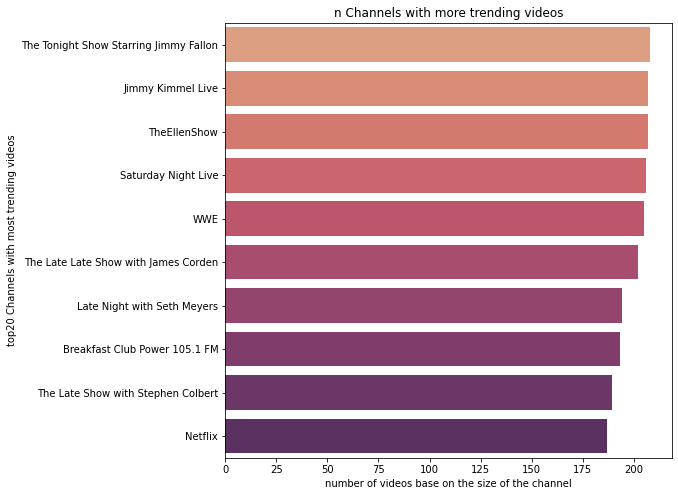

In [8]:
channel_with_more_videos(10)

In [9]:
#chanels with more views and more views

In [10]:
def channel_with_more_videos_and_View(n):
    chanelsbysizeandview = pd.DataFrame(df[['channel_title','views']].groupby('channel_title')['views'].mean())#.reset_index(name="view_mean")
    chanelsbysizeandview['channels_count'] = df[['channel_title','views']].groupby('channel_title')['views'].count()
    
    chanelsbysizeandview_avg = chanelsbysizeandview.loc[(chanelsbysizeandview.views >= 800000) & (chanelsbysizeandview.channels_count >= 50)]
    
    topn_chanelsbysizeand_views =  chanelsbysizeandview_avg.sort_values(by=('views'), ascending=False).head(n)#.reset_index()
    top_recommendations = topn_chanelsbysizeand_views.index
    return top_recommendations

In [11]:
channel_with_more_videos_and_View(5)

Index(['NickyJamTV', 'DrakeVEVO', 'Ozuna', 'Ed Sheeran', 'TaylorSwiftVEVO'], dtype='object', name='channel_title')

In [ ]:
#video title with the most view per channel_title

In [12]:
def video_rec_per_channel(channel):
    
    videos = []
    
    for i in (df['channel_title']):
        
        if i == channel:
            
            videos = df.loc[df['channel_title'] == i, :]
            
            channel_withmoreviews = videos.groupby('title')[['views']].sum()#.reset_index()
            channel_withmoreviews.sort_values(by='views',inplace=True,ascending=False)
            channel_withmoreviews.head(1)
    
    return channel_withmoreviews.head(1)

In [13]:
video_rec_per_channel('Netflix')

,views
title,
13 Reasons Why: Season 2 | Official Trailer [HD] | Netflix,165092557


In [14]:
def cat_rec (category):

    videos = []
    
    for i in (df['category_names']):
        
        if i == category:
            videos = df.loc[df['category_names'] == i, :]
            video = videos.groupby(['publish_year', 'publish_month', 'channel_title', 'title', 'category_names']).agg({'views': 'sum'}).sort_values(('views'), ascending=False).head(5)
    
    return video

In [ ]:
cat_rec('Autos & Vehicles')